# Exact diagonalization in 2D : Toric Code (TC) model

This is a paradigmatic model involving spin-1/2 system, which is exactly solvable and it has a highly entangled ground state (GS). In a toroidal boundary condition, this has a four fold GS degeneracy, which is independent of the geometry. Moreover, the excitations are even intersting, it has two types of bosonic excitation, while the mutual statistics is semionic, i.e. one of the bosonic excitation sees other as source of $\pi$-flux. For a refference see chapter 3 and 4 of <a href='https://arxiv.org/pdf/0904.2771.pdf'>this lecture note</a>.

The Hamiltonian is given by:

$$ \mathcal{H}= -J_{e}\sum_{s}A_{s}-J_{m}\sum_{p}B_{p} $$

For our purpose we will assume $J_e=J_m=J_{TC}$. In the rest of the notebook we will do the following things:

* Construct a two dimensional Hamiltonian and solve it
* By applying global operator we will split the four fold degeneracy.
* Study a phase transiton to a paramagnet (??).

In [1]:
# basic python operations
import numpy as np

# scientific coputing
from functools import reduce
import scipy.sparse as sps
import scipy.sparse.linalg as spslin
from scipy.optimize import curve_fit

# visualization
import matplotlib.pyplot as plt

In [2]:
# Loading the Pauli matrices

Id = sps.eye(2)
Sx = sps.csr_matrix(np.array([[0,1.],[1.,0]]))
Sy = sps.csr_matrix(np.array([[0,-1.j],[1.j,0]]))
Sz = sps.csr_matrix(np.array([[1.,0.],[0,-1.]]))

### Loading the adjacency list

In [3]:
Lx,Ly=2,2
N_2d=2*Lx*Ly
s=np.arange(N_2d)
T1=np.array([3,2,4,5,7,6,0,1])
T2=np.array([2,3,5,4,6,7,1,0])
I1=np.array([6,7,1,0,2,3,5,4])
I2=np.array([7,6,0,1,3,2,4,5])
Tx=np.array([1,0,3,2,5,4,7,6])

In [4]:
J_tc=1.
As=[[-J_tc,i,Tx[i],T1[i],I2[i]] for i in [0,1,4,5]]
Bp=[[-J_tc,i,Tx[i],T1[i],I2[i]] for i in [2,3,6,7]]

static=[["xxxx",As],["zzzz",Bp]]

In [5]:
static;

# Defining the Hamiltonian

In [6]:
def ham_general(L,static):
    ham_gen=np.zeros(shape=(2**L,2**L),dtype=np.float)
    for item in static:
        string=item[0]
        for inside in item[1:len(item)]:
            for j in range(len(inside)):
                op_list=[Id]*L
                for k in range(len(string)):
                    if string[k]=='x':
                        op_list[inside[j][k+1]]=Sx
                    elif string[k]=='y':
                        op_list[inside[j][k+1]]=Sy
                    elif string[k]=='z':
                        op_list[inside[j][k+1]]=Sz
                #print(reduce(sps.kron,op_list).toarray())
                ham_gen += inside[j][0]*reduce(sps.kron,op_list).toarray()
    #            
    return ham_gen

## Diagonalization of the Hamiltonian

In [7]:
(e2,u) = spslin.eigsh(ham_general(N_2d,static), k=16, which='SA',return_eigenvectors=True)

e2

array([-8., -8., -8., -8., -4., -4., -4., -4., -4., -4., -4., -4., -4.,
       -4., -4., -4.])

Notice that the four fold degeneracy is there with an excitation gap $\Delta\sim 4$. Since electric or the magnetic excitation comes in pair the excitation gap is matching with the expectation.

# TCM with a Wilson loop

In the TC model, we can define a global operator of loop winding the full system in two different direction. These are called Wilson loop. In terms of the Wilson loop, the ground state is then given by the quantum numbers: $|m,n\rangle$, while $(m,n)\in(-1,1)$. Which gives the 4 fold degeneracy. We can seperate them out by applying the same global loop operator since these states are eigenstate of the loop operators. See the above mentioned lecture note for more details.

Our new Hamiltonian involving the loop operators is:

$$ \mathcal{H}= -J_{e}\sum_{s}A_{s}-J_{m}\sum_{p}B_{p}-w_x\prod_{i\in \rm{loop-x}}\sigma^z_i-w_y\prod_{i\in \rm{loop-y}}\sigma^z_i $$

These loops wind around the system along the two non-contractable loops in a toroidal geometry.

In [8]:
J_tc=1.
As=[[-J_tc,i,Tx[i],T1[i],I2[i]] for i in [0,1,4,5]]
Bp=[[-J_tc,i,Tx[i],T1[i],I2[i]] for i in [2,3,6,7]]

gz=.001
Wx=[[-gz,0,1]]
Wy=[[-gz,2,6]]

static=[["xxxx",As],["zzzz",Bp],["zz",Wx],["zz",Wy]]

In [9]:
(e2,u) = spslin.eigsh(ham_general(N_2d,static), k=16, which='SA',return_eigenvectors=True)

e2

array([-8.002, -8.   , -8.   , -7.998, -4.002, -4.002, -4.002, -4.002,
       -4.002, -4.002, -4.002, -4.002, -4.002, -4.002, -4.002, -4.002])

Interestingly, notice that we have arbitraryly set the strength of the loop as $0.1%$ of the TC strength. Which splits the GS degeracy as four times the strength of the loop. Since there are two such loop, the degeneracy split is as expected!

$$ \Delta_{new}=-7.998-(-8.002)=.004 $$

# Phase transition to a paramagnet

We consider the Hamiltonian:

$$ \mathcal{H}= -J_{TC}\left(\sum_{s}A_{s}+\sum_{p}B_{p}\right)-h_z\sum_{i}\sigma^z_i $$

This is the part of the Hamiltonian considered by these papers: <a href='https://journals.aps.org/prb/pdf/10.1103/PhysRevB.82.085114'>paper 1</a> and <a href='https://journals.aps.org/prb/pdf/10.1103/PhysRevB.79.033109'>paper 2</a>. The phase transition is second order.

For our purpose let's consider:

$$J_{TC}=(1-t)~;~h_z=t~;~{\rm with}~t\in [0,1]$$

Also we will keep the Wilson loop part with a negligible contribution to make sure the degeneracy is splitted.

In [10]:
t_arr=np.linspace(0,1,41)
evalu=10

energy=np.ndarray(shape=(len(t_arr),evalu))

for j in range(len(t_arr)):
    J_tc=(1.-t_arr[j])
    # the TCM
    As=[[-J_tc,i,Tx[i],T1[i],I2[i]] for i in [0,1,4,5]]
    Bp=[[-J_tc,i,Tx[i],T1[i],I2[i]] for i in [2,3,6,7]]
    # the wilson loop
    gz=.0001
    Wx=[[-gz,0,1]]
    Wy=[[-gz,2,6]]
    # the z-field
    hz=t_arr[j]
    Hz=[[-hz,i] for i in range(N_2d)]
    # build the adjacent list
    static=[["xxxx",As],["zzzz",Bp],["zz",Wx],["zz",Wy],['z',Hz]]
    (e2,u) = spslin.eigsh(ham_general(N_2d,static), k=evalu, which='SA',return_eigenvectors=True)
    energy[j,:]=np.sort(e2)

In [11]:
energy[0,:];

In [12]:
gap=np.ndarray(shape=(len(t_arr),evalu))

for j in range(len(t_arr)):
    gap[j,:]=energy[j,:]-energy[j,0]

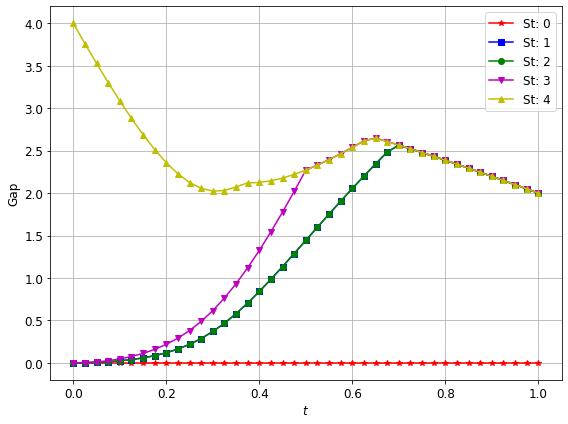

In [13]:
ms,fs=6,12

plt.figure(figsize=(8,6))
color=['r','b','g','m','y','c','k']
marker=['*','s','o','v','^','x']
for k in range(5):
    plt.plot(t_arr,gap[:,k],'%s%s-'%(color[k],marker[k]),markersize=ms,label='St: %d'%(k))
plt.ylabel('Gap',fontsize=fs)
plt.xlabel('$t$',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.grid()
plt.tight_layout()
plt.show()

Furthermore by studying GS susceptibilty, i.e. the send derivative of the GS energy, we can find out the phase transition point.

In [14]:
sus=np.ndarray(shape=(len(t_arr)-2))

for j in range(len(sus)):
    sus[j]=(41*41)*abs(energy[j,0]+energy[j+2,0]-2*energy[j+1,0])
    
sus;

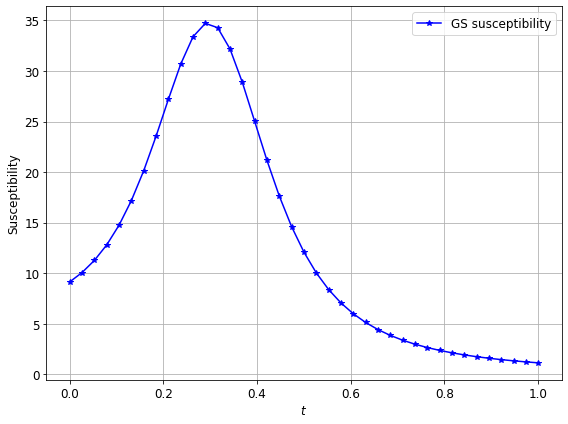

In [15]:
ms,fs=6,12

plt.figure(figsize=(8,6))
color=['r','b','g','m','y','c','k']
marker=['*','s','o','v','^','x']
plt.plot(np.linspace(0,1,39),sus,'b*-',markersize=ms,label='GS susceptibility')
plt.ylabel('Susceptibility',fontsize=fs)
plt.xlabel('$t$',fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)
plt.legend(fontsize=fs)
plt.grid()
plt.tight_layout()
plt.show()

Although we are severely limited by the system size, it is clear that the phase transition is happening around $t\sim .3$. It will be more clearer if we do a system size scaling around that point, in the increasing system size we should expect the gap closing, i.e. collapse of he tower of states.

There are many more exotic phase transition out of the TC model GS, those has been studied. Among them one of the interesting phase transtion is to the bond dependent symmetry broken ferromagnetic order (<a href='https://journals.aps.org/prb/pdf/10.1103/PhysRevB.102.235124'>link</a>). I was delighted to be the first auther of that paper, where we showed the phase transition is self dual modified abelian Higg's which is severely constrained by the anyon permutation symmetry.

In this paper we numerically verified the phase transition in more details. Also here we computed the topological entanglement entrpy of the TCM, which is due to long range entanglement in the system.